In [ ]:
import os
from zipfile import ZipFile
import pandas as pd


zip_path = "/content/drive/MyDrive/Colab Notebooks/homework.zip"

extracted_path = "/content/tmp"
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

main_folder_path = os.path.join(extracted_path, "data")

df = pd.DataFrame()

actions = {'idle': 0, 'running': 1, 'stairs': 2, 'walking': 3}

for action, label in actions.items():
    action_folder_path = os.path.join(main_folder_path, action)

    for file_name in os.listdir(action_folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(action_folder_path, file_name)
            action_df = pd.read_csv(file_path)
            df = pd.concat([df, action_df], ignore_index=True)
            df.loc[df.index[-len(action_df):], 'Action'] = label

unique_actions = df['Action'].unique()
print(unique_actions)

print(df.head())

!rm -r $extracted_path

[0. 1. 2. 3.]
   accelerometer_X  accelerometer_Y  accelerometer_Z  Action
0         0.244209        -0.009577         9.753978     0.0
1         0.268151        -0.014365         9.768343     0.0
2         0.248997        -0.028730         9.730036     0.0
3         0.258574        -0.004788         9.787497     0.0
4         0.272939        -0.004788         9.777920     0.0


In [ ]:
print(df.describe())
print(df.info())
print(df['Action'].value_counts())

       accelerometer_X  accelerometer_Y  accelerometer_Z         Action
count    193860.000000    193860.000000    193860.000000  193860.000000
mean          1.923550         1.598343         1.804896       1.437326
std           8.404867        12.474041         7.191590       1.067815
min         -39.188293       -39.188293       -39.188293       0.000000
25%          -2.494758        -8.327033        -2.494758       1.000000
50%           0.248997        -0.009577         0.905008       1.000000
75%           4.668694         8.671799         7.187394       3.000000
max          39.188293        39.188293        39.188293       3.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   Ac

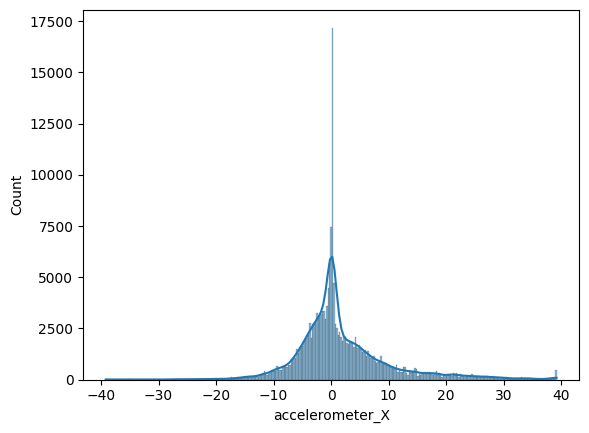

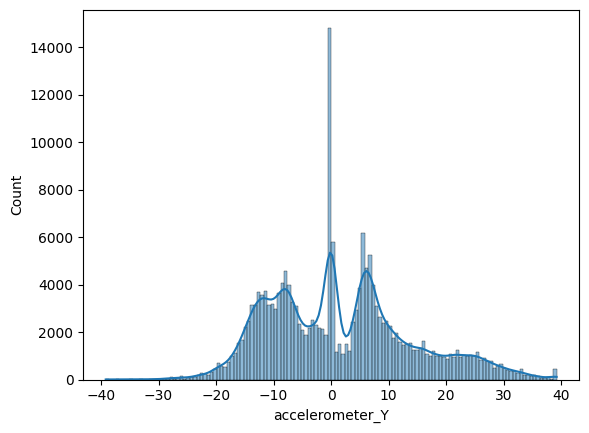

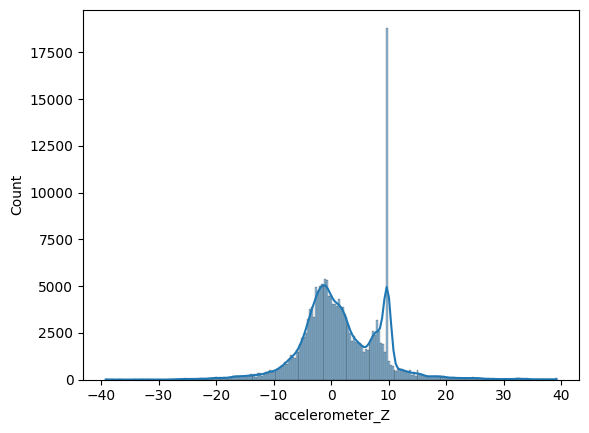

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']
for feature in features:

  sns.histplot(df[feature], kde=True)
  plt.show()

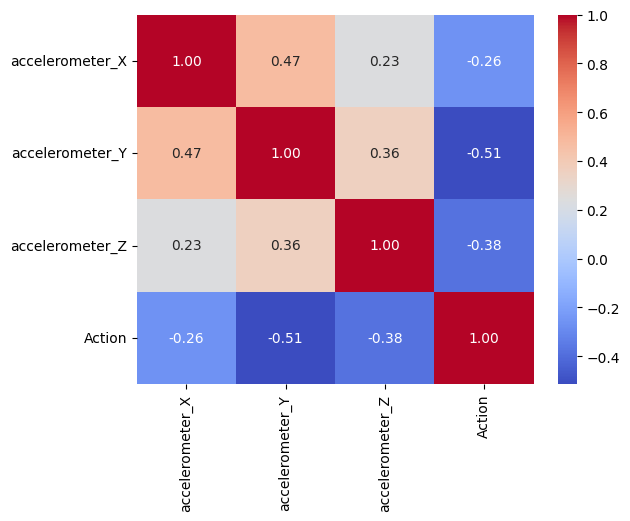

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report




X = df.drop('Action', axis=1)
y = df['Action']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      6203
         1.0       0.93      0.90      0.92     20485
         2.0       1.00      0.00      0.00      1022
         3.0       0.80      0.91      0.85     11062

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.89      0.88     38772


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6203
         1.0       1.00      1.00      1.00     20485
         2.0       1.00      0.99      1.00      1022
         3.0       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



In [ ]:
from sklearn.metrics import confusion_matrix


models = [
    ('SVM', SVC()),
    ('SVM (RBF Kernel)', SVC(kernel='rbf', C=1, gamma='scale')),
    ('Random Forest', RandomForestClassifier()),
    ('Random Forest (200 Trees)', RandomForestClassifier(n_estimators=200))
]


for model_name, model in models:

    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, predictions))

    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, predictions))
    print("=============================================")

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      6203
         1.0       0.93      0.91      0.92     20485
         2.0       1.00      0.00      0.01      1022
         3.0       0.80      0.90      0.85     11062

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.89      0.88     38772

Confusion Matrix for SVM:
[[ 6102    84     0    17]
 [  187 18553     0  1745]
 [    7   289     3   723]
 [   22  1035     0 10005]]
Classification Report for SVM (RBF Kernel):
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      6203
         1.0       0.93      0.91      0.92     20485
         2.0       1.00      0.00      0.01      1022
         3.0       0.80      0.90      0.85     11062

    accuracy                           0.89     38772
   macro avg       0.92      

In [ ]:
new_df = df.copy()


new_df['mean_total'] = new_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].mean(axis=1)
new_df['std_total'] = new_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].std(axis=1)
new_df['median_total'] = new_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].median(axis=1)
new_df

,accelerometer_X,accelerometer_Y,accelerometer_Z,Action,mean_total,std_total,median_total
0,0.244209,-0.009577,9.753978,0.0,3.329537,5.565176,0.244209
1,0.268151,-0.014365,9.768343,0.0,3.340710,5.568286,0.268151
2,0.248997,-0.028730,9.730036,0.0,3.316768,5.555789,0.248997
3,0.258574,-0.004788,9.787497,0.0,3.347094,5.579107,0.258574
4,0.272939,-0.004788,9.777920,0.0,3.348690,5.569608,0.272939
...,...,...,...,...,...,...,...
193855,-2.834735,-13.637373,-5.382165,3.0,-7.284758,5.647047,-5.382165
193856,4.635175,-10.687716,-5.248090,3.0,-3.766877,7.768091,-5.248090
193857,9.586384,-9.279925,-3.078943,3.0,-0.924161,9.615962,-3.078943
193858,-2.183512,-2.509123,1.886631,3.0,-0.935335,2.449311,-2.183512


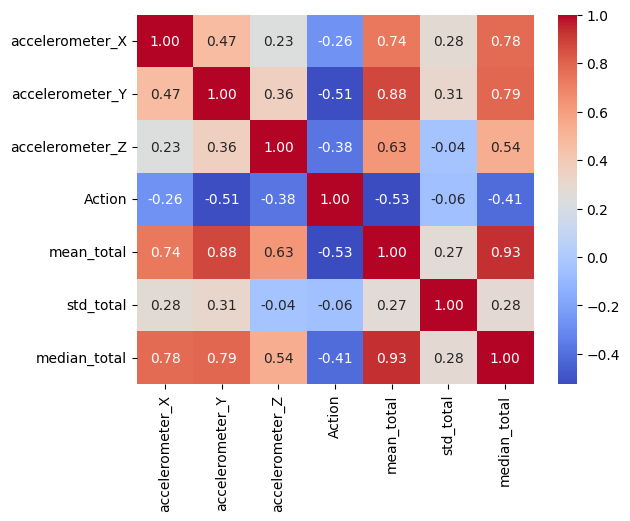

In [ ]:
correlation_matrix = new_df.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
X = new_df.drop('Action', axis=1)
y = new_df['Action']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)


print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      6203
         1.0       0.93      0.91      0.92     20485
         2.0       1.00      0.00      0.01      1022
         3.0       0.81      0.90      0.85     11062

    accuracy                           0.90     38772
   macro avg       0.93      0.70      0.69     38772
weighted avg       0.90      0.90      0.89     38772


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6203
         1.0       1.00      1.00      1.00     20485
         2.0       1.00      0.99      1.00      1022
         3.0       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



In [ ]:
import numpy as np
sec_df = df.copy()
for axis in ['X', 'Y', 'Z']:

    sec_df[f'mean_{axis}'] = sec_df[f'accelerometer_{axis}'].mean()
    sec_df[f'std_{axis}'] = sec_df[f'accelerometer_{axis}'].std()
    sec_df[f'median_{axis}'] = sec_df[f'accelerometer_{axis}'].median()
    sec_df[f'min_{axis}'] = sec_df[f'accelerometer_{axis}'].min()
    sec_df[f'max_{axis}'] = sec_df[f'accelerometer_{axis}'].max()
    sec_df[f'gradient_{axis}'] = np.gradient(sec_df[f'accelerometer_{axis}'])

sec_df['mean_total'] = sec_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].mean(axis=1)
sec_df['std_total'] = sec_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].std(axis=1)
sec_df['median_total'] = sec_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].median(axis=1)
sec_df

,accelerometer_X,accelerometer_Y,accelerometer_Z,Action,mean_X,std_X,median_X,min_X,max_X,gradient_X,...,gradient_Y,mean_Z,std_Z,median_Z,min_Z,max_Z,gradient_Z,mean_total,std_total,median_total
0,0.244209,-0.009577,9.753978,0.0,1.92355,8.404867,0.248997,-39.188293,39.188293,0.023942,...,-0.004788,1.804896,7.19159,0.905008,-39.188293,39.188293,0.014365,3.329537,5.565176,0.244209
1,0.268151,-0.014365,9.768343,0.0,1.92355,8.404867,0.248997,-39.188293,39.188293,0.002394,...,-0.009576,1.804896,7.19159,0.905008,-39.188293,39.188293,-0.011971,3.340710,5.568286,0.268151
2,0.248997,-0.028730,9.730036,0.0,1.92355,8.404867,0.248997,-39.188293,39.188293,-0.004789,...,0.004788,1.804896,7.19159,0.905008,-39.188293,39.188293,0.009577,3.316768,5.555789,0.248997
3,0.258574,-0.004788,9.787497,0.0,1.92355,8.404867,0.248997,-39.188293,39.188293,0.011971,...,0.011971,1.804896,7.19159,0.905008,-39.188293,39.188293,0.023942,3.347094,5.579107,0.258574
4,0.272939,-0.004788,9.777920,0.0,1.92355,8.404867,0.248997,-39.188293,39.188293,-0.011971,...,-0.002395,1.804896,7.19159,0.905008,-39.188293,39.188293,-0.011971,3.348690,5.569608,0.272939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193855,-2.834735,-13.637373,-5.382165,3.0,1.92355,8.404867,0.248997,-39.188293,39.188293,0.835577,...,-1.556231,1.804896,7.19159,0.905008,-39.188293,39.188293,-3.488352,-7.284758,5.647047,-5.382165
193856,4.635175,-10.687716,-5.248090,3.0,1.92355,8.404867,0.248997,-39.188293,39.188293,6.210560,...,2.178724,1.804896,7.19159,0.905008,-39.188293,39.188293,1.151611,-3.766877,7.768091,-5.248090
193857,9.586384,-9.279925,-3.078943,3.0,1.92355,8.404867,0.248997,-39.188293,39.188293,-3.409344,...,4.089296,1.804896,7.19159,0.905008,-39.188293,39.188293,3.567361,-0.924161,9.615962,-3.078943
193858,-2.183512,-2.509123,1.886631,3.0,1.92355,8.404867,0.248997,-39.188293,39.188293,-2.209848,...,1.228225,1.804896,7.19159,0.905008,-39.188293,39.188293,2.324770,-0.935335,2.449311,-2.183512


In [ ]:
X = sec_df.drop('Action', axis=1)
y = sec_df['Action']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


class_weights = {0.0: 1, 1.0: 1, 2.0: 10, 3.0: 1}
svm_model_weighted = SVC(class_weight=class_weights)
svm_model_weighted.fit(X_train_scaled, y_train)
svm_model_weighted_prediction = svm_model_weighted.predict(X_test_scaled)


print("Classification Report for svm_model_weighted:")
print(classification_report(y_test, svm_model_weighted_prediction))

Classification Report for svm_model_weighted:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6234
         1.0       0.97      0.93      0.95     20448
         2.0       0.19      0.77      0.31       990
         3.0       0.92      0.74      0.82     11100

    accuracy                           0.88     38772
   macro avg       0.77      0.86      0.77     38772
weighted avg       0.94      0.88      0.90     38772

